In [2]:
import tensorflow as tf
a = tf.placeholder("float")
b = tf.placeholder("float")
y = tf.multiply(a, b)
sess = tf.Session()
print sess.run(y, feed_dict={a: 3, b: 3})

9.0


In [4]:
import numpy as np
num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

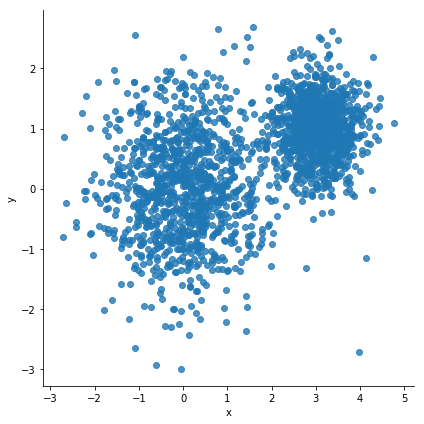

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                  "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

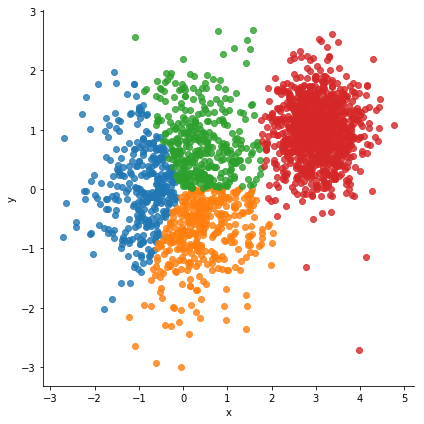

In [26]:
import numpy as np
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in xrange(k)], 0)

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [37]:
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k, -1]))
print vectors.get_shape()
print centroides.get_shape()

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
print expanded_vectors.get_shape()
print expanded_centroides.get_shape()

(2000, 2)
(4, 2)
(1, 2000, 2)
(4, 1, 2)


In [39]:
diff = tf.subtract(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(distances, 0)
print diff
print sqr
print distances
print assignments

Tensor("Sub_13:0", shape=(4, 2000, 2), dtype=float32)
Tensor("Square_13:0", shape=(4, 2000, 2), dtype=float32)
Tensor("Sum_13:0", shape=(4, 2000), dtype=float32)
Tensor("ArgMin_13:0", shape=(2000,), dtype=int64)


In [41]:
assigments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)
print assignments

Tensor("ArgMin_13:0", shape=(2000,), dtype=int64)


In [43]:
means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), reduction_indices=[1]) for c in xrange(k)], 0)

In [44]:
update_centroides = tf.assign(centroides, means)

In [45]:
init_op = tf.global_variables_initializer()

In [52]:
sess = tf.Session()
sess.run(init_op)
num_steps = 8
for step in xrange(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
    
print centroid_values

[[-0.16933735  0.91187239]
 [ 3.01066852  0.99111849]
 [ 0.78425914 -0.3366141 ]
 [-0.79258436 -0.59539962]]


In [54]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [55]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [56]:
x = tf.placeholder("float", [None, 784])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [57]:
y_ = tf.placeholder("float", [None, 10])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

In [58]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [59]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [61]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100);
    sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})

In [62]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [63]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [64]:
print sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels})

0.9175
